<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/MEGA_KNN_10f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:

dataset = pd.read_csv("/content/drive/MyDrive/Thesis_Data/MEGA_10f.csv")

In [13]:
dataset.head()

Sleep_Stage  MedianF_Beta_F4  Spectral Edge_Beta_F4  Spectral Edge_Beta_C4  \
0           W         19.73073               33.84195               33.21756   
1           W         17.23317               29.34634               28.47220   
2           W         17.60780               28.22244               26.84878   
3           W         17.35805               28.72195               28.09756   
4           W         17.23317               28.09756               28.09756   

   PeakF_Beta_F4  Spectral Edge_Alpha_F4  MedianF_Beta_C4  PeakF_Beta_C4  \
0       15.98439                17.48293         19.98049       16.85854   
1       19.60585                16.85854         17.35805       17.35805   
2       18.73171                17.48293         17.60780       14.23610   
3       16.35902                17.10829         18.85659       16.35902   
4       17.60780                17.23317         17.35805       17.60780   

   MeanF_Alpha_F4  MeanF_Beta_F4  MeanF_Beta_C4  
0        18.48195       29.84585       28.97171  
1        17.48293       26.34927       26.34927  
2        17.98244       25.47512       24.85073  
3        17.60780       26.47415       26.34927  
4        17.60780       25.84976       26.09951

In [14]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 504  811  117  420  599]
 [ 492 5447 1198  499  328]
 [  53 1499 2454   74   46]
 [ 373  998  217 1486  228]
 [ 520  554  125  290 2359]]
              precision    recall  f1-score   support

          N1       0.26      0.21      0.23      2451
          N2       0.59      0.68      0.63      7964
          N3       0.60      0.59      0.60      4126
           R       0.54      0.45      0.49      3302
           W       0.66      0.61      0.64      3848

    accuracy                           0.56     21691
   macro avg       0.53      0.51      0.52     21691
weighted avg       0.56      0.56      0.56     21691



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

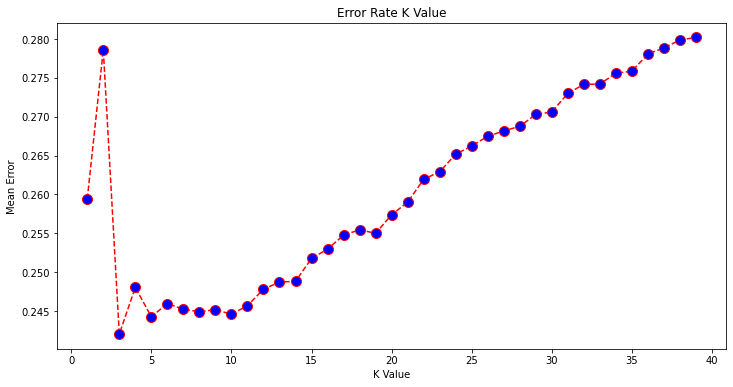

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')